In [ ]:
## Setup

In [1]:
# Common Imports

import sys
import os

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras

# Seed creation to stabalize output
np.random.seed(42)
tf.random.set_seed(42)

# To make some pretty figures
%matplotlib inline
import matplotlib.pyplot as plt

# Ignore useless warnings
import warnings
warnings.filterwarnings(action="ignore", message="înternal gelsd")

In [2]:
# Set the directory for the data
os.chdir("/Users/choi_/Desktop/Devanagiri")

In [3]:
# Load the Data
data = pd.read_csv("data.csv")

In [4]:
data.head(n=6)

,pixel_0000,pixel_0001,pixel_0002,pixel_0003,pixel_0004,pixel_0005,pixel_0006,pixel_0007,pixel_0008,pixel_0009,...,pixel_1015,pixel_1016,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023,character
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,character_01_ka


In [5]:
## Group Data
data.groupby("character").count()

,pixel_0000,pixel_0001,pixel_0002,pixel_0003,pixel_0004,pixel_0005,pixel_0006,pixel_0007,pixel_0008,pixel_0009,...,pixel_1014,pixel_1015,pixel_1016,pixel_1017,pixel_1018,pixel_1019,pixel_1020,pixel_1021,pixel_1022,pixel_1023
character,,,,,,,,,,,,,,,,,,,,,
character_01_ka,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
character_02_kha,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
character_03_ga,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
character_04_gha,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
character_05_kna,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
character_06_cha,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
character_07_chha,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
character_08_ja,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000
character_09_jha,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,...,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000


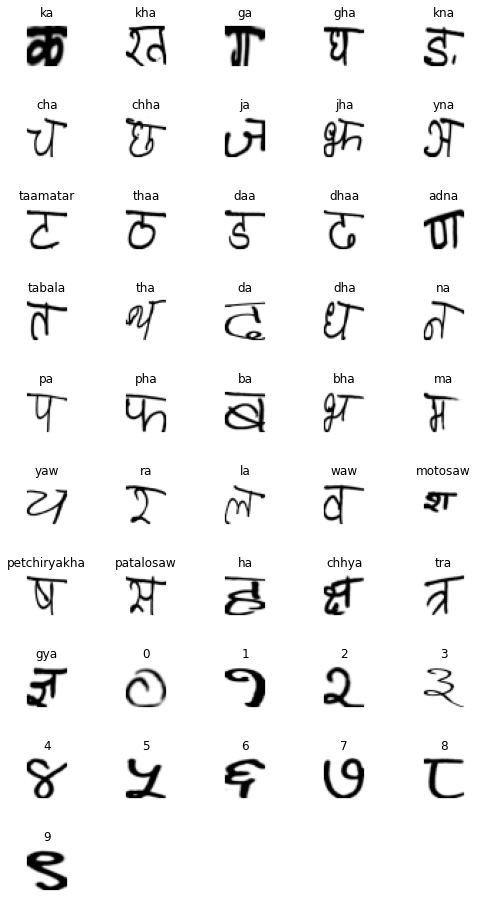

In [6]:
## Visualizing the letters and numbers.
char_names = data.character.unique()
rows =10;columns=5;
fig, ax = plt.subplots(rows,columns, figsize=(8,16))

## Loop through rows and columns in rows.
for row in range(rows):
    for col in range(columns):
        ax[row,col].set_axis_off()
        if columns*row+col < len(char_names):
            x = data[data.character==char_names[columns*row+col]].iloc[0,:-1].values.reshape(32,32)
            x = x.astype("float64")
            x/=255
            ax[row,col].imshow(x, cmap="binary")
            ax[row,col].set_title(char_names[columns*row+col].split("_")[-1])
            

plt.subplots_adjust(wspace=1, hspace=1)
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

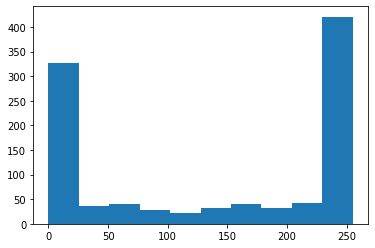

In [7]:
# Verify the pixel distribution of any random character
plt.hist(data.iloc[0,:-1])
plt.show

In [8]:
# Normalize pixel values and set the character column to target variable
X = data.values[:,:-1]/255.0
Y = data["character"].values

In [9]:
#Minimize memory consumption.

del data
n_classes = 46

In [10]:
#Split and scale the dataset
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

# Encode the categories
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)
y_train = keras.utils.to_categorical(y_train, n_classes)
y_test = keras.utils.to_categorical(y_test, n_classes)

In [11]:
# Image sizes
img_height_rows = 32
img_width_cols = 32

In [12]:
#Image shapes
im_shape = (img_height_rows, img_width_cols, 1)
x_train = x_train.reshape(x_train.shape[0], *im_shape)
x_test = x_test.reshape(x_test.shape[0], *im_shape)

In [13]:
## Sequential Model

In [14]:
model = keras.models.Sequential()
# Input Layer;
# A "Flatten" Layer converts each input image into a 1 dimensional array.
model.add(keras.layers.Flatten(input_shape=[32, 32]))

# Hidden Layers:
# Dense Layer
model.add(keras.layers.Dense(128, activation="relu"))
model.add(keras.layers.Dense(64, activation="relu"))

# Output Layer
model.add(keras.layers.Dense(46, activation="softmax"))


In [15]:
## Show information about the model

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               131200    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 46)                2990      
Total params: 142,446
Trainable params: 142,446
Non-trainable params: 0
_________________________________________________________________


In [17]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [18]:
weights, biases = hidden1.get_weights()

In [19]:
weights

array([[ 0.0237525 , -0.00851494, -0.02123458, ..., -0.03625527,
         0.01316909, -0.00034781],
       [ 0.0574168 , -0.05459716, -0.05262956, ...,  0.00341001,
         0.04810236,  0.04046746],
       [ 0.03615373,  0.03999458,  0.02226564, ..., -0.06656852,
        -0.04221009, -0.00478783],
       ...,
       [ 0.00175734,  0.06394486,  0.03832131, ..., -0.01288333,
        -0.04579232,  0.06350455],
       [-0.00010912,  0.02459528,  0.03987635, ..., -0.01945174,
         0.0030791 ,  0.01762914],
       [ 0.0085711 ,  0.04928233, -0.04383858, ..., -0.06322712,
         0.00675934, -0.04774335]], dtype=float32)

In [20]:
weights.shape

(1024, 128)

In [21]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [22]:
biases.shape

(128,)

In [25]:
# Compile the model
model.compile(optimizer="sgd",
             loss="categorical_crossentropy",
             metrics=["accuracy"])

In [26]:
## Train the model

In [27]:
## Defining the root log directory
root_logdir = os.path.join(os.curdir, "my_logs")

In [28]:
# Function that generates subdirectory path based on date+time
def get_run_logdir():
    import time
    run_id = time.strftime("run_%%_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)
run_logdir = get_run_logdir()
run_logdir

'.\\my_logs\\run_%_12_08-22_43_35'

In [29]:
#Define callbacks

# Model checkpoint
checkpoint_cb = keras.callbacks.ModelCheckpoint("devanigiri.h5", save_Best_only=True)

#Early Stopping (with Rollback to the best model)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

#Tensorboard
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

In [30]:
# Convert the arrays to tensor
X = tf.convert_to_tensor(x_train, dtype=tf.float32)
Y = tf.convert_to_tensor(y_train, dtype=tf.float32)
XT = tf.convert_to_tensor(x_test, dtype=tf.float32)
YT = tf.convert_to_tensor(y_test, dtype=tf.float32)


history = model.fit(X, Y, epochs=30, batch_size=32, validation_data=(XT, YT), callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])

Epoch 1/30
   1/2013 [..............................] - ETA: 2s - loss: 3.8795 - accuracy: 0.0312WARNING:tensorflow:From C:\Users\choi_\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\tensorflow\python\ops\summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
2013/2013 [==============================] - 6s 3ms/step - loss: 2.3967 - accuracy: 0.4028 - val_loss: 1.4575 - val_accuracy: 0.6113
Epoch 2/30
2013/2013 [==============================] - 5s 3ms/step - loss: 1.2816 - accuracy: 0.6572 - val_loss: 1.1852 - val_accuracy: 0.6807
Epoch 3/30
2013/2013 [==============================] - 9s 5ms/step - loss: 1.0932 - accuracy: 0.7063 - val_loss: 1.0637 - val_accuracy: 0.7132
Epoch 4/30
2013/2013 [==============================] - 4s 2ms/step - loss: 0.9653 - accuracy: 0.7396 - va

In [31]:
## After running fit() a history object with the info about the result is returned
history.params

{'verbose': 1, 'epochs': 30, 'steps': 2013}

In [32]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [33]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

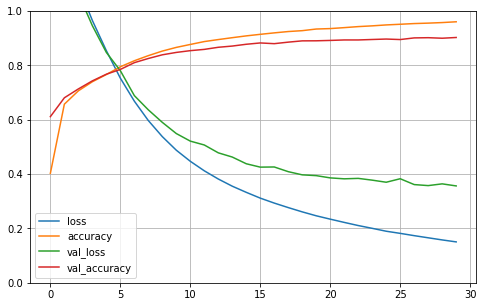

In [34]:
# Shows the learning curves
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [35]:
## Evaluation of the model.

In [36]:
model.evaluate(XT,YT)

863/863 [==============================] - 1s 1ms/step - loss: 0.3564 - accuracy: 0.9025


[0.35641777515411377, 0.9025362133979797]

In [37]:
# Make predictions with probabilities for the first 3 instances in the test.
X_new = XT[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.99, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.99, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  ]], dtype=float32)

In [38]:
# Make predictions without probabilities.
y_pred = model.predict_classes(X_new)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([36,  8, 26], dtype=int64)

In [39]:
# Check if the predictions were correct
y_new = YT[:3]
y_new

<tf.Tensor: shape=(3, 46), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
      dtype=float32)>

In [40]:
np.array(char_names)[y_pred]

array(['digit_0', 'character_09_jha', 'character_27_ra'], dtype=object)